---
$$ Data Analyst 
$$
$$Final Project 
$$
$$GROUP-1-ABANG-RMT-040$$
___

# I. LIBRARY

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import warnings
warnings.filterwarnings("ignore")
import string


# II. DATA LOADING

In [52]:
df = pd.read_csv('shopee_qna_data_clean.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  808 non-null    int64 
 1   questions   808 non-null    object
 2   answers     808 non-null    object
 3   category    668 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.4+ KB


## Data Source Characteristic

- Dataset ini berasal dari hasil scraping halaman FAQ Shopee. Setelah proses scraping, data telah dibersihkan secara manual karena terdapat beberapa kasus khusus yang membutuhkan penanganan langsung. Dataset yang digunakan sudah bersih, tidak memiliki missing values, dan terdiri dari 808 pertanyaan dan jawaban yang sering ditanyakan. Dataset ini akan digunakan sebagai dasar untuk membangun model chatbot LLM untuk menjawab pertanyaan seputar Shopee.

In [53]:
df

,Unnamed: 0,questions,answers,category
0,0,Apa itu Lelang di Shopee Live?,Aktivitas lelang di Shopee Live memungkinkan A...,Shopee Live
1,1,Apa itu Produk Grosir?,Produk Grosir mengacu pada barang yang tersedi...,Grosir
2,2,Apa itu Shopee Barokah?,Shopee Barokah merupakan fitur yang disediakan...,Shopee Barokah
3,3,Siapa Penjual Star atau Star+ Shopee?,Penjual StarPenjual Star Shopee adalah Penjual...,Baru di Shopee
4,4,Apa saja kategori streaming yang dianggap berk...,Untuk memastikan pengalaman yang maksimal bagi...,Shopee Live
...,...,...,...,...
803,803,Bagaimana cara mengakses situs Shopee Partner?,Situs Shopee Partner adalah salah satu portal ...,Merchant ShopeePay
804,804,Bagaimana cara melakukan perubahan Entitas (na...,Jika Anda ingin melakukan perubahan entitas (p...,NaN
805,805,Berapa biaya Merchant Discount Rate (MDR) yang...,ShopeePay sebagai Penyedia Jasa Sistem Pembaya...,NaN
806,806,Bagaimana cara meminta pengembalian PPh 23 ata...,PT Airpay International Indonesia saat ini tel...,NaN


## Shopee Page Characteristic

Tingginya traffic pada laman FAQ Shopee menunjukkan bahwa banyak pengguna mengunjungi halaman tersebut untuk mencari solusi atas kendala yang mereka alami atau sekadar ingin memahami lebih dalam mengenai fitur-fitur dan layanan yang ditawarkan Shopee. Hal ini wajar terjadi mengingat Shopee memiliki ekosistem digital yang kompleks—mulai dari ShopeePay, ShopeeFood, program loyalitas, hingga integrasi dengan berbagai mitra logistik dan merchant.

Dengan begitu banyak fitur dan proses yang berjalan secara digital, tak jarang pengguna—baik pembeli maupun penjual—mengalami kebingungan atau memiliki pertanyaan yang spesifik. Oleh karena itu, halaman FAQ menjadi pintu pertama yang mereka datangi sebelum memilih untuk menghubungi layanan pelanggan.

Melihat kebutuhan akan akses informasi yang cepat dan efisien, hadir ABANG (Asisten Bot Andalan Ngomongin e-commerce), sebuah chatbot berbasis LLM (Large Language Model) yang dirancang untuk menjadi solusi pintar dalam menjawab berbagai pertanyaan pengguna. ABANG hadir bukan hanya untuk memberi jawaban, tapi juga untuk menjadi teman ngobrol interaktif yang siap membantu 24/7. Dengan memahami bahasa alami pengguna, ABANG mampu menjawab pertanyaan seputar akun, pesanan, pembayaran, promosi, hingga masalah teknis dengan respons yang cepat dan akurat.

Kini, pengguna tak perlu lagi menggali informasi secara manual di laman FAQ—cukup tanya ABANG, semua jadi terang!

# III. EDA

## 1. Distribusi pertanyaan per kategori

<function matplotlib.pyplot.show(close=None, block=None)>

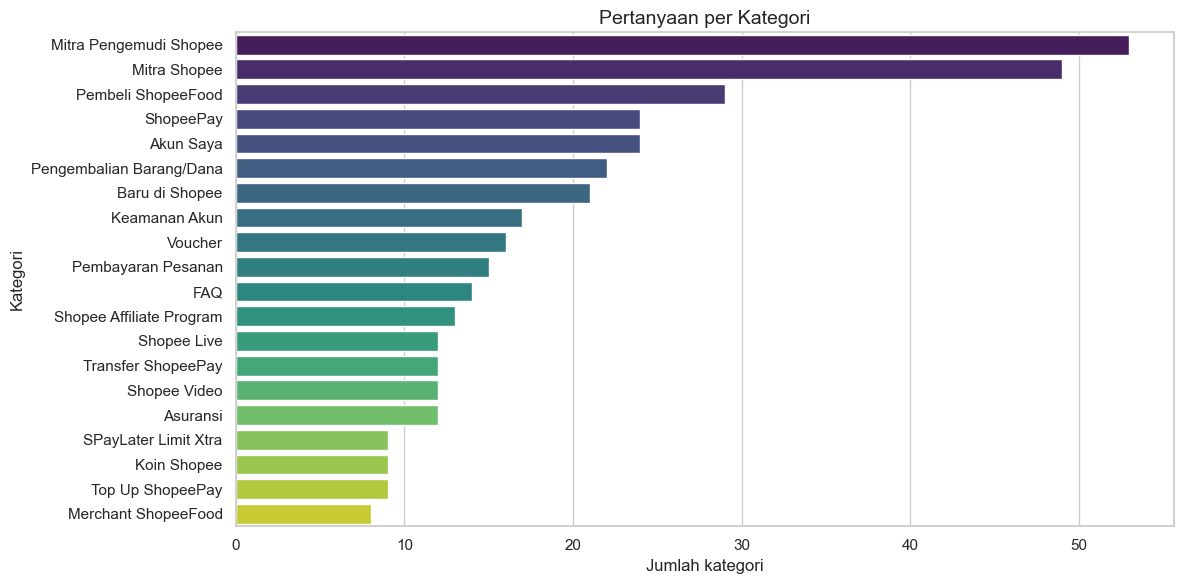

In [55]:
sns.set(style="whitegrid")

category_counts = df['category'].value_counts().sort_values(ascending=False).head(20)

#Plot
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title("Pertanyaan per Kategori", fontsize=14)
plt.xlabel("Jumlah kategori")
plt.ylabel("Kategori")
plt.tight_layout()
plt.show

- Pertanyaan terbanyak berasal dari kategori `Mitra Pengemudi Shopee`,`Mitra Shopee`, `Pembeli ShopeeFood`, dan `Shopeepay` yang mana menunjukkan bahwa fitur yang melibatkan banyak pihak eksternal (mitra dan pengguna akhir) cenderung memunculkan kebingungan atau butuh klarifikasi tambahan.
Untungnya, shopee telah meningkatkan edukasi & SOP bagi mitra pengemudi shopee dan shopeefood yang di publish di link [berikut](https://ekbis.sindonews.com/read/1134769/34/tingkatkan-kualitas-layanan-shopeefood-gelar-pelatihan-bagi-mitra-pengemudi-1687439207?utm_source=chatgpt.com)

- Dan untuk `shopeepay` juga masih memiliki dustribusi yang menunjukkan bahwa banyak pertanyaan yang muncul terkait pengguna nya, walaupun layanan ini populer dibanding e-wallet yang lain seperti yang dijelaskan di web [berikut](https://katadata.co.id/digital/fintech/5fa28bae033b6/riset-ipsos-pengguna-shopeepay-lebih-loyal-dibanding-ovo-dan-gopay?utm_source=chatgpt.com), masih banyak aspek yang perlu dijelaskan kepada pengguna untuk meningkatkan pengalaman mereka. 

## 2. Wordcloud dari pertanyaan

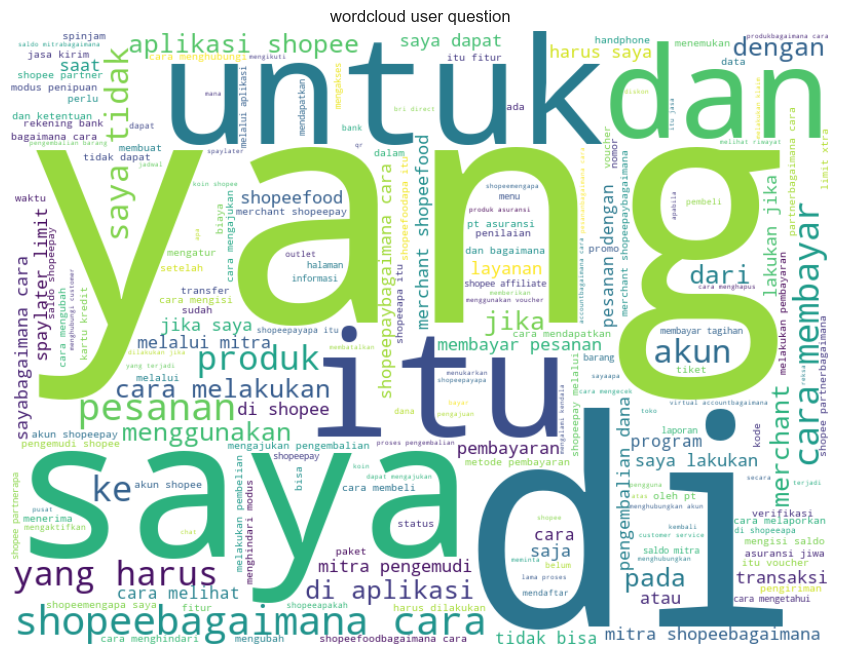

In [56]:
all_question = ''.join(df['questions'].dropna()).lower()
question_clean = all_question.translate(str.maketrans('', '', string.punctuation))

wordcloud = WordCloud(width=800, height=600, background_color='white', colormap='viridis').generate(question_clean)
#show
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("wordcloud user question", fontsize= 12)
plt.show()

- Kata-kata paling dominan:
"saya", "yang", "untuk", "di", "itu", "cara", "bagaimana", "menggunakan"
Ini menunjukkan bahwa mayoritas pertanyaan ditulis dari sudut pandang pengguna pribadi (user-centric), dan bersifat operasional/instruksional.

- Konteks penggunaan:

Kata seperti "merchant", "shopee", "aplikasi", "akun", "produk", "pesanan", dan "pembayaran" menunjukkan bahwa pertanyaan paling banyak berkisar seputar:
- 1 Cara menggunakan aplikasi Shopee
- 2 Pengelolaan akun dan pesanan
- 3 Proses transaksi, pembayaran, dan refund

 Insight: Fitur seperti video tutorial, tooltips di aplikasi, atau panduan interaktif akan sangat membantu.
Shopee juga bisa mengidentifikasi fitur yang paling membingungkan dan buat kampanye edukasi terfokus untuk itu.

## 3. Rata-rata panjang karakter antara pertanyaan dan jawaban

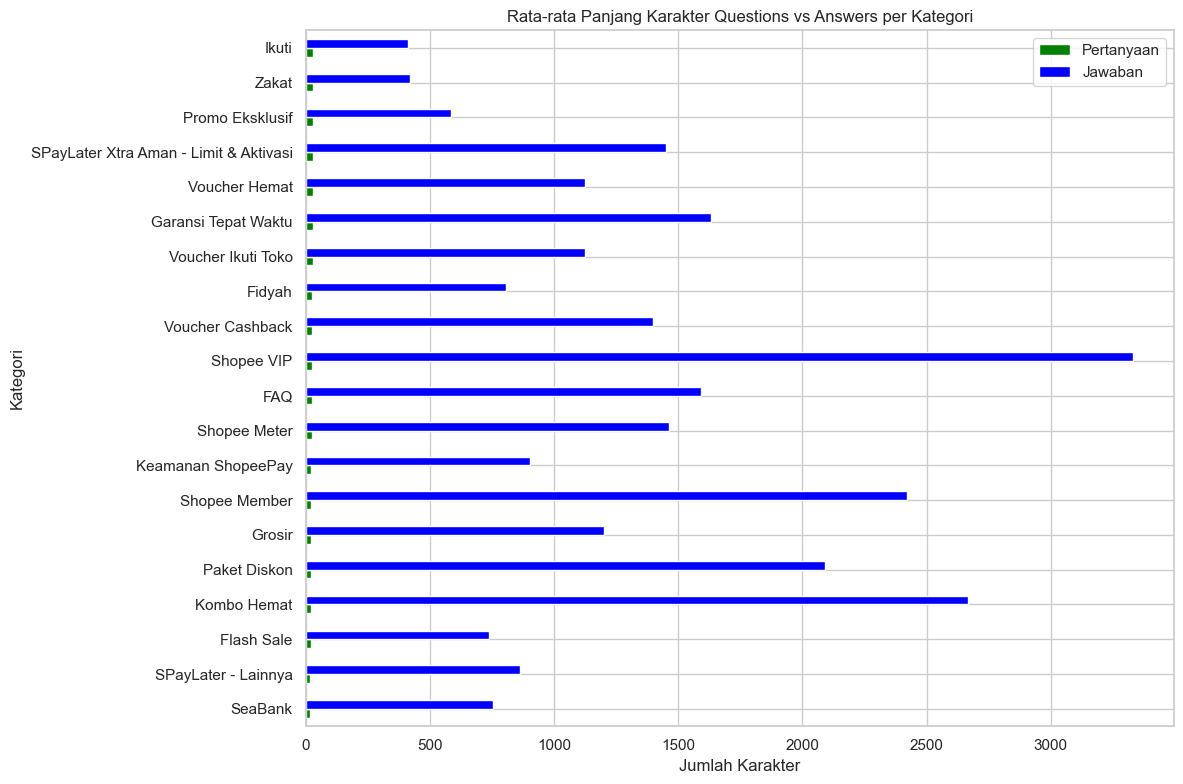

In [66]:
# Hitung rata-rata panjang karakter langsung dalam groupby
avg_lengths = (
    df.groupby('category')
    .agg({
        'questions': lambda x: x.astype(str).str.len().mean(),
        'answers': lambda x: x.astype(str).str.len().mean()
    })
    .rename(columns={'questions': 'question_length', 'answers': 'answer_length'})
    .sort_values(by='question_length', ascending=True)
    .head(20)
)

# Plot
avg_lengths.plot(kind='barh', figsize=(12, 8), color=['green', 'blue'])
plt.title("Rata-rata Panjang Karakter Questions vs Answers per Kategori")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Kategori")
plt.legend(["Pertanyaan", "Jawaban"])
plt.tight_layout()
plt.show()


Beberapa kategori seperti `Shopee VIP`, `FAQ`, dan `Shopee Member` memiliki jawaban yang sangat panjang, sementara pertanyaannya sangat singkat. Ini bisa jadi indikator bahwa:

Informasi dalam jawaban tidak terstruktur atau terlalu verbose. Maka pengguna awam bisa kesulitan memahami fitur ini, sehingga butuh penjelasan mendalam.

- Rekomendasi:

Lakukan review konten jawaban FAQ dan optimalkan agar lebih ringkas dan mudah dipahami, misalnya dengan bullet points atau visual.

# IV. SUMMARIZE

`ABANG` merupakan chatbot yang dapat memudahkan pelanggan shope menjawab berbagai permasalahan seputar FAQ. Dan chatbot ini mampu menjawab seputar konflik umum dengan hanya memasukkan pertanyaan yang dibutuhkan lalu maka akan muncul jawaban yang ditanyakan. dengan `ABANG`, maka :
- ⏱ Efisiensi waktu CS: Pertanyaan berulang langsung dijawab ABANG.

- 🤝 Customer Experience lebih baik: Respon cepat dan informatif 24/7.